In [1]:
class Boids:
    def __init__(self, N):
        self.pos = [width/2.0, height/2.0] + 10*np.random.rand(2*N).reshape(N, 2)
        angles = 2*math.pi*np.random.rand(N)
        self.vel = np.array(list(zip(np.sin(angles), np.cos(angles))))
        self.N = N
        self.minDist = 25.0
        self.maxRuleVel = 0.03
        self.maxVel = 2.0

## Class

0. 파이썬에서 모든것이 객체(Object)다. OOP(Object Oriented Programming)
1. 클래스는 동작과 상태를 갖는다. 
    - 동작(Behavior): Methode로 표현
    - 상태(State): 속성(Attribute)
    - *클래스 안에 정의된 함수를 메소드라고 한다. 
2. 클래스로 객체 만들기 : 클래스를 이용하려면 클래스로 객체를 만들어야 한다. "객체 인스턴스화"
3. 객체는 동작은 공유하지만 상태는 공유하지 않는다. 

In [1]:
class CountFromBy:
    pass

In [5]:
a = CountFromBy() #함수 호출과의 차이점? (클래스: 카멜, 함수: 스네이크)
a

-  클래스로 객체만들기 : 인터프리터가 하는일, 클래스명에 괄호를 추가해 객체를 만든다음 변수에 새로 만든 객체를 할당한다. 

In [6]:
b = CountFromBy
b

__main__.CountFromBy

In [7]:
class CountFromBy:
    def __init__(self, v=0, i=1):
        self.val = v
        self.incr = i
    def increase(self):
        self.val += self.incr        

### 메서드 호출하기 
- a.increase() --> CountFromBy.increase(a)
- 인터프리터가 'a'값을 self에 할당한다. 
- 모든 메서드의 첫번째 인자는 self이며 self의 값은 인터프리터가 제공한다. 
- self.var += self.incr : 객체가 현재 'val'값을 가져다 'incr'값만큼 증가시킨다. 

In [11]:
a = CountFromBy()
a.increase()

In [12]:
a.val

1

### 메소드 안의 self는 무슨 의미일까?

In [13]:
class CountFromBy:
    def increase(self):
        val += incr

In [14]:
a = CountFromBy()
a.increase()
#a
#print(a.val)

UnboundLocalError: local variable 'val' referenced before assignment

In [15]:
class CountFromBy:
    def increase(self):
        val, incr = 0, 1
        val += incr

In [16]:
class CountFromBy:
    def increase(self):
        self.val = 0
        self.incr = 1
        self.val += self.incr

In [17]:
a = CountFromBy()
a.increase()

### (메서드 안의) self는 무슨 의미일까?
"객체의"
- 모든 메서드는 첫번째 인자로 현재 객체의 별칭을 전달한다. 일반적으로 파이썬에서는 이 첫번째 인자를 self로 표현한다. 
- self인자를 사용하지 않으면, 객체의 속성값은 메서드가 종료되면 소멸된다.
- 메서드에서는 self를 붙여서 클래스의 속성에 접근할 수 있다.   
- 객체에 속한 속성값을 사용하므로 메서드 실행이 끝난 뒤에도 속성값이 남아 있어야 한다.  


### 초기화 (```__init__```)
- 속성을 초기화 해주기도 한다. 
- 이미 다른 OOP언어(JAVA등)에선 생성자를 이용해 객체 인스턴스화와 속성을 초기화 한다. 
- Python에선 ```__init__```(던더init) init생성자를 이용해 속성만 초기화 한다!!!
- 파이썬에서는 인터프리터가 객체 인스턴스화 과정을 처리하므로 생성자로 인스턴스화를 관리할 필요가 없다
- 속성 초기화는 ```__init__```생성자를 이용한다.  (파이썬에선 던더가 붙은 걸 매직 매서드라고 한다.)

### 매직매서드
- 던더는 클래스의 표준동작을 제공한다. (메서드!!!, *일명 함수)
- 던더를 오버라이드 하지 않으면 object라 불리는 클래스로 표준동작이 구현되어 제공된다. 
- 우리가 만든 객체가 등호연산(==)에 사용되었을 때 ```__eq__```메서드를 오버라이드 해서 변경가능
- 혹은, > 연산자를 바꾸고 싶으면 ```__ge__```메서드를 오버라이드 한다. 

In [41]:
class CountFromBy:
    def __init__(self):
        pass
    def increase(self):
        self.val += self.incr


- init메서드로 클래스의 속성(val, incr)를 초기화 해야 한다. 
- 그럼 초기값은 어디서 받는가?
- ```__init__```의 인자로 받는다. 

In [29]:
class CountFromBy:
    def __init__(self, v, i):
        self.val = v
        self.incr = i
    def increase(self):
        self.val += self.incr

h = CountFromBy(10, 20 )
h.increase()
h.val

30

### 인터프리터가 클래스의 메서드를 이해하는 방법.

In [19]:
a = CountFromBy()

TypeError: __init__() missing 2 required positional arguments: 'v' and 'i'

- 인터프리터는 ```__init__```메서드가 v와 i라는 두개의 인자를 못받았다고 말하고 있다.!
- 즉, 우리는 클래스에 인자를 제공하지 않았는데 인터프리터는 클래스에 제공한 인자가 새 객체를 만들때 ```__init__```메서드로 전달되는 것처럼 말한다.

In [20]:
h = CountFromBy(100, 10)
h.val

100

In [21]:
h.incr

10

In [24]:
h.increase()
h.val

130

### .val과 .incr를 이용해 속성에 접근할 수 있다. 
- 이는 따른 OOP언어에서는 게터와 세터를 만드는것에 비해 파이썬은 게터 세터없이 객체명과 속성명으로 속성값에 접근이 가능하다. 

### Wrap-Up
1. 클래스는 동작(behavior, (메서드로 구현)), 상태(State, (변수를 선언, Atrribute))를 갖는다. 
2. 객체의 인스턴스화
3. self
4. 메서드 (self)
5. 메서드 호출 ㅣ 인터프리터에서 클래스의 메서드가 호출된다는 의미
6. 속성값 접근 (호출 이란 용어를 쓰진 않음)
7. ```__init__``` 속성값 초기화. 

### 클래스변수 와 인스턴스 변수
- 속성값 초기화 말고 다른 말로, 클래스 변수와 인스턴스 변수 라고도 표현한다. 

In [31]:
class BookReader:
    country ='Korea'
    def __init__(self, name):
        self.name = name
    def read_book(self):
        print(self.name + 'is reading book!!')

- class 변수 : country
- instance 변수 : name (초기화 함수 오버라이드 한뒤), 인스턴스 변수 name 선언

In [32]:
c = BookReader('Chris')
p = BookReader('Peter')

In [33]:
c.country

'Korea'

In [36]:
p.country

'Korea'

In [35]:
c.name

'Chris'

In [38]:
p.name
p.read_book()

Peteris reading book!!


- 클래스에 선언된 속성은 클래스 변수라고 하며 이 클래스에 의해 생성된 모든 객체에 대해 같은 속성(값)을 갖는다. 
- 객체가 인스턴스화 될 때마다 새로운 값이 할당되며 서로 다른 객체 간에는 속성(값)을 공유 할 수 없다.

In [1]:
import math
import numpy as np

In [68]:
width, height = 640, 480
pos = [width/2.0, height/2.0]
width, height


(640, 480)

In [6]:
pos

[320.0, 240.0]

In [77]:
N = 10
pos = pos + 10*np.random.rand(2*N).reshape(N, 2)

In [78]:
pos

array([[12.70841489, 19.64037067],
       [19.46858582, 16.46765111],
       [14.86965051, 19.51822407],
       [27.29902603, 15.85102499],
       [20.59911835, 14.36366143],
       [15.02723181, 20.70405771],
       [ 7.92924489, 11.83372363],
       [14.21431164, 24.89635316],
       [14.05628119, 17.86006949],
       [15.07517229, 11.92870551]])

In [82]:
#<보충설명>np.random.rand() 메소드 설명
a = np.random.rand(5)
a

array([0.34597103, 0.34608157, 0.45055105, 0.6140065 , 0.48208855])

In [14]:
angles = 2*math.pi*np.random.rand(N)

In [16]:
angles

array([5.12451212, 0.77761207, 2.26936648, 0.70535423, 4.40082219,
       5.42779284, 4.8818449 , 3.64083117, 1.44865956, 3.93724838])

In [18]:
vel = np.array(list(zip(np.sin(angles), np.cos(angles))))
vel

array([[-0.91627245,  0.40055561],
       [ 0.70157981,  0.71259089],
       [ 0.76576254, -0.64312343],
       [ 0.64830358,  0.76138195],
       [-0.95185444, -0.30655037],
       [-0.7548284 ,  0.65592231],
       [-0.98567667,  0.16864609],
       [-0.47875714, -0.87794738],
       [ 0.99255057,  0.12183333],
       [-0.71432265, -0.69981652]])

In [32]:
np.sin(angles)

array([-0.91627245,  0.70157981,  0.76576254,  0.64830358, -0.95185444,
       -0.7548284 , -0.98567667, -0.47875714,  0.99255057, -0.71432265])

In [20]:
np.cos(angles)

array([ 0.40055561,  0.71259089, -0.64312343,  0.76138195, -0.30655037,
        0.65592231,  0.16864609, -0.87794738,  0.12183333, -0.69981652])

In [93]:
#<충설명> zip()
a = {'a':1, 'b':2, 'c':3}
b = {'k':2, 'l':3, 'i':4}
c = list(zip(a,b))
#k = [i for i in zip(a,b)]
#k
c


[('a', 'k'), ('b', 'l'), ('c', 'i')]

In [33]:
#<보충설명> zip()
h = [sum(i) for i in zip(a,b)]
h

[3, 5, 7]

In [34]:
def applyBC(self):
    """경계조건을 적용한다"""
    deltaR = 2.0
    for coord in self.pos:
        if coord[0] > width + deltaR:
            coord[0] = -deltaR
        elif coord[0] < - deltaR:
            coord[0] = width + deltaR
        elif coord[1] > height + deltaR:
            coord[1] = -deltaR
        elif coord[1] < -deltaR:
            coord[1] = height + deltaR 

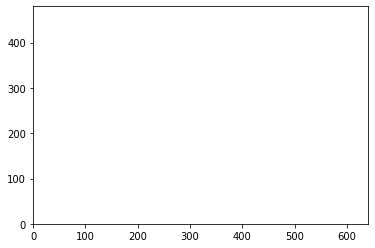

In [38]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes(xlim=(0, width), ylim=(0, height))

In [41]:
import matplotlib.animation as animation
pos = ax.plot([], [], markersize=10, c='k', marker='o', ls='None')
beak = ax.plot([], [], markersize=4, c='r', marker='o', ls='None')
anim = animation.FuncAnimation(fig, tick, fargs=(pts, beak, boids), interval=50)

NameError: name 'tick' is not defined

## Class복습 

In [5]:
class CountFromBy:
    def __init__(self, v=0, i=1):
        self.val = v
        self.incr = i
    def increase(self):
        self.val += self.incr
    def __repr__(self):
        return str(self.val)

In [9]:
a = CountFromBy()
print(a)

0


In [10]:
a.increase()
#class는 동작과 상태가 있다. 동작(method)과 상태(attribute).
#class는 동작은 공유하지만 상태는 공유하지 않는다. 
#상태는 self라는 객체를 이용해 속성값을 저장한다. 
#인자가 self면 메서드, self가 아니면 함수 
#CountFromBy.increase(a), increase메서드는 아무 인자를 받지 않은 것이 아니다. 
#메서드를 호출할 때, 인터프리터가 현재 객체를 self에 할당한다. 
#self라는 객체를 이용해 속성값을 저장한다. 

In [11]:
a

1

In [40]:
import sys, argparse
import math
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.animation as animation
from scipy.spatial.distance import squareform, pdist, cdist
from numpy.linalg import norm

width, height = 640, 480

class Boids:
    """Class that represents Boids simulation"""
    def __init__(self, N):
        """ initialize the Boid simulation"""
        # init position & velocities
        self.pos = [width/2.0, height/2.0] + 10*np.random.rand(2*N).reshape(N, 2)
        # normalized random velocities
        angles = 2*math.pi*np.random.rand(N)
        self.vel = np.array(list(zip(np.sin(angles), np.cos(angles))))
        self.N = N
        # min dist of approach
        self.minDist = 25.0
        # max magnitude of velocities calculated by "rules"
        self.maxRuleVel = 0.03
        # max maginitude of final velocity
        self.maxVel = 2.0

    def tick(self, frameNum, pts, beak):
        """Update the simulation by one time step."""
        # get pairwise distances
        self.distMatrix = squareform(pdist(self.pos))
        # apply rules:
        self.vel += self.applyRules()
        self.limit(self.vel, self.maxVel)
        self.pos += self.vel
        self.applyBC()
        # update data
        pts.set_data(self.pos.reshape(2*self.N)[::2], 
                     self.pos.reshape(2*self.N)[1::2])
        vec = self.pos + 10*self.vel/self.maxVel
        beak.set_data(vec.reshape(2*self.N)[::2], 
                      vec.reshape(2*self.N)[1::2])

    def limitVec(self, vec, maxVal):
        """limit magnitide of 2D vector"""
        mag = norm(vec)
        if mag > maxVal:
            vec[0], vec[1] = vec[0]*maxVal/mag, vec[1]*maxVal/mag
    
    def limit(self, X, maxVal):
        """limit magnitide of 2D vectors in array X to maxValue"""
        for vec in X:
            self.limitVec(vec, maxVal)
            
    def applyBC(self):
        """apply boundary conditions"""
        deltaR = 2.0
        for coord in self.pos:
            if coord[0] > width + deltaR:
                coord[0] = - deltaR
            if coord[0] < - deltaR:
                coord[0] = width + deltaR    
            if coord[1] > height + deltaR:
                coord[1] = - deltaR
            if coord[1] < - deltaR:
                coord[1] = height + deltaR
    
    def applyRules(self):
        # apply rule #1 - Separation
        D = self.distMatrix < 25.0
        vel = self.pos*D.sum(axis=1).reshape(self.N, 1) - D.dot(self.pos)
        self.limit(vel, self.maxRuleVel)

        # different distance threshold
        D = self.distMatrix < 50.0

        # apply rule #2 - Alignment
        vel2 = D.dot(self.vel)
        self.limit(vel2, self.maxRuleVel)
        vel += vel2;

        # apply rule #1 - Cohesion
        vel3 = D.dot(self.pos) - self.pos
        self.limit(vel3, self.maxRuleVel)
        vel += vel3

        return vel

    def buttonPress(self, event):
        """event handler for matplotlib button presses"""
        # left click - add a boid
        if event.button is 1:
            self.pos = np.concatenate((self.pos, 
                                       np.array([[event.xdata, event.ydata]])), 
                                      axis=0)
            # random velocity
            angles = 2*math.pi*np.random.rand(1)
            v = np.array(list(zip(np.sin(angles), np.cos(angles))))
            self.vel = np.concatenate((self.vel, v), axis=0)
            self.N += 1 
        # right click - scatter
        elif event.button is 3:
            # add scattering velocity 
            self.vel += 0.1*(self.pos - np.array([[event.xdata, event.ydata]]))
        
def tick(frameNum, pts, beak, boids):
    #print frameNum
    """update function for animation"""
    boids.tick(frameNum, pts, beak)
    return pts, beak



In [49]:
# number of boids
N = 100

boids = Boids(N)

boids.applyRules()

AttributeError: 'Boids' object has no attribute 'distMatrix'

In [45]:
a = boids.applyBC()

In [47]:
a.applyRules()

AttributeError: 'NoneType' object has no attribute 'applyRules'

In [52]:
class Car:
    price = 3000
    def __init__(self, color, category):
        #자동차 색상, 자동차 종류 (srting) 입력하세요"
        self.color = color
        self.category = category
    def drive(self):
        print("driving")

        

In [55]:
mycar = Car('red','sedan')
yourcar = Car('blue','sportscar')

In [59]:
mycar.a

30

In [60]:
yourcar.a

30